# Aprendizaje no Supervisado: Análisis de Componentes Principales

## Introducción

La característica principal de los algoritmos de aprendizaje no supervisados, cuando se compara con los métodos de clasificación y regresión, es que los datos de entrada no están etiquetados (es decir, no hay etiquetas o clases) y que el algoritmo aprende la estructura de los datos sin ayuda. Esto crea dos diferencias principales. En primer lugar, nos permite procesar grandes cantidades de datos porque no es necesario etiquetarlos manualmente. En segundo lugar, es difícil evaluar la calidad de un algoritmo no supervisado debido a la ausencia de una métrica de bondad explícita como se usa en el aprendizaje supervisado.

Una de las tareas más comunes en el aprendizaje no supervisado es la reducción de la dimensionalidad. Por un lado, la reducción de dimensionalidad puede ayudar con la visualización de datos (por ejemplo, método t-SNA) mientras que, por otro lado, puede ayudar a lidiar con la multicolinealidad de sus datos y preparar los datos para un método de aprendizaje supervisado (por ejemplo árboles de decisión).

## Análisis de Componentes Principales (PCA)

El Análisis de Componentes Principales es uno de los métodos más fáciles, más intuitivos y más utilizados para la reducción de dimensionalidad, proyectando datos en su subespacio de características ortogonales.

En términos más generales, todas las observaciones se pueden considerar como un elipsoide en un subespacio de un espacio característico inicial, y la nueva base establecida en este subespacio se alinea con los ejes elipsoidales. Esta suposición nos permite eliminar características altamente correlacionadas dado que los vectores de conjuntos de bases son ortogonales. En el caso general, la dimensionalidad elipsoidal resultante coincide con la dimensionalidad espacial inicial, pero la suposición de que nuestros datos se encuentran en un subespacio con una dimensión más pequeña nos permite cortar el espacio "excesivo" con la nueva proyección (subespacio). Logramos esto de una manera "codiciosa", seleccionando secuencialmente cada uno de los ejes elipsoides identificando dónde la dispersión es máxima.

<img src="../figuras/PCA.png" width="75%">

Echemos un vistazo a la formulación matemática de este proceso:
Para disminuir la dimensionalidad de nuestros datos de $n$ a $k$ con $k ≤ n$, ordenamos nuestra lista de ejes en orden de dispersión decreciente y tomamos el primeros-k de ellos.
Comenzamos por calcular la dispersión y la covarianza de las características iniciales. Esto generalmente se hace con la matriz de covarianza. De acuerdo con la definición de covarianza, la covarianza de dos características se calcula de la siguiente manera:

$$cov(X_i,X_j)=E[(X_i-\mu_i)(X_j-\mu_j)]=E[X_iX_j]-\mu_i\mu_j$$

donde $\mu$ es el valor esperado del i-ésimo atributo. Vale la pena señalar que la covarianza es simétrica, y la covarianza de un vector consigo mismo es igual a su dispersión.

Por lo tanto, la matriz de covarianza es simétrica con la dispersión de las características correspondientes en la diagonal. Los valores no diagonales son las covarianzas del par de características correspondiente. En términos de matrices donde X es la matriz de observaciones, la matriz de covarianza es la siguiente:

$$\sum=E[(X-E[X])(X-E[X])^T$$

Las matrices, como operadores lineales, tienen valores propios (eigenvalue) y vectores propios (eigenvector). Son muy convenientes porque describen partes de nuestro espacio que no rotan y solo se estiran cuando aplicamos operadores lineales sobre ellas; Los vectores propios permanecen en la misma dirección pero se estiran por un valor propio correspondiente. Formalmente, una matriz $M$ con vector propio $w$ y valor propio $\lambda$ satisface esta ecuación:

$$Mw_i={\lambda}w_i$$

La matriz de covarianza para una muestra X puede escribirse como un producto de una matriz transpuesta X y X. De acuerdo con el cociente de Rayleigh, la variación máxima de nuestra muestra se encuentra a lo largo del vector propio de esta matriz y es consistente con el valor propio máximo. Por lo tanto, los componentes principales que pretendemos retener de los datos son solo los vectores propios que corresponden a los primeros-k valores propios más grandes de la matriz.

Posteriormete multiplicamos la matriz de nuestros datos X por estos componentes para obtener la proyección de nuestros datos sobre la base ortogonal de los componentes elegidos. Si la cantidad de componentes era menor que la dimensionalidad espacial inicial, recuerde que perderemos cierta información al aplicar esta transformación.

### Pasos para el Análisis de Componentes Principales

El algoritmo PCA procede de la siguiente manera:

1.  Normalice los atributos originales: elimine la media de cada atributo
2.  Calcule la matriz de covarianza en los datos normalizados. Esta es una matriz simétrica $n \times n$, donde $n$ es el número de atributos originales, y el elemento en la fila $i$ y la columna $j$ es la covarianza entre la columna i-ésima y la j-ésima en el conjunto de datos.
3.  Calcule los vectores propios y los valores propios de la matriz de covarianza. Estos vectores propios deben ser vectores propios unitarios, es decir, sus longitudes son 1. Este paso es el más intrincado, y la mayoría de los paquetes de software pueden hacerlo automáticamente.
4.  Elija los $k$ vectores propios con los valores propios más altos.
5. Calcule los atributos $k$ finales, asociados con los k valores propios más altos: para cada uno, multiplique la matriz del conjunto de datos, por el vector propio asociado. Aquí suponemos que el vector propio tiene una columna y $n$ filas ($n$ es el número de atributos originales), mientras que la matriz del conjunto de datos tiene $n$ columnas y $m$ filas ($m$ es el número de observaciones), por lo tanto, los atributos finales resultantes tienen $m$ filas y una columna: proporciona los valores para los nuevas atributos, calculados en cada una de las $m$ observaciones.
6. Es posible que desee volver a poner la media que se eliminó en el paso 1.

### Ejemplo Sencillo

In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

El comportamiento de PCA es fácil de visualizar al observar un conjunto de datos bidimensionales. Considera los siguientes 150 puntos:

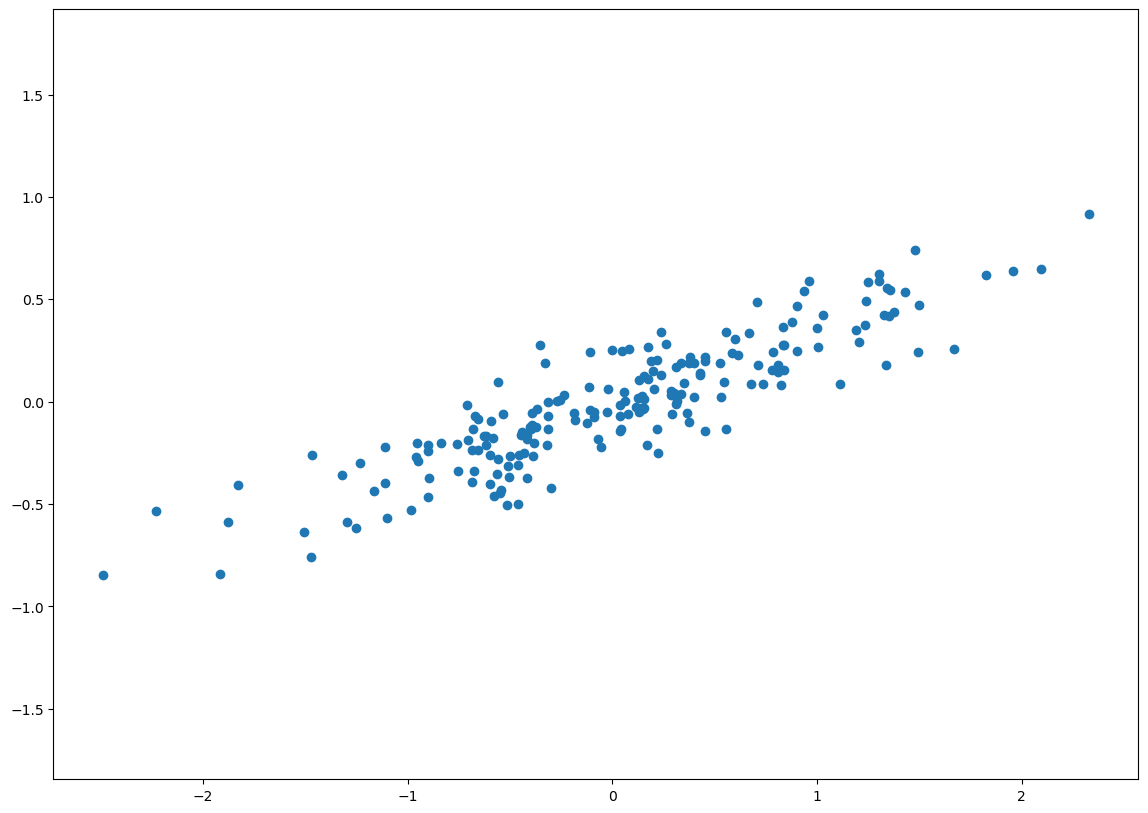

In [31]:
generador = np.random.RandomState(1)
X = np.dot(generador.rand(2, 2), generador.randn(2, 200)).T
plt.figure(figsize=(14,10))
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

A simple vista, está claro que existe una relación casi lineal entre las variables $x$ y $y$. El aprendizaje no supervisado intenta aprender sobre la relación entre los valores $x$ y $y$.

En el análisis de los componentes principales, esta relación se cuantifica al encontrar una lista de los principales ejes en los datos, y al usar esos ejes para describir el conjunto de datos. Usando el estimador PCA de Scikit-Learn, podemos calcular esto de la siguiente manera:

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

El ajuste aprende algunas características de los datos, sobre todo los "componentes" y la "varianza explicada":

In [33]:
print(pca.components_)

[[ 0.94446029  0.32862557]
 [-0.32862557  0.94446029]]


In [34]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[0.7625315 0.0184779]
[0.97634101 0.02365899]


Para ver lo que significan estos números, visualicémoslos como vectores sobre los datos de entrada, usando los "componentes" para definir la dirección del vector, y la "varianza explicada" para definir la longitud cuadrada del vector:

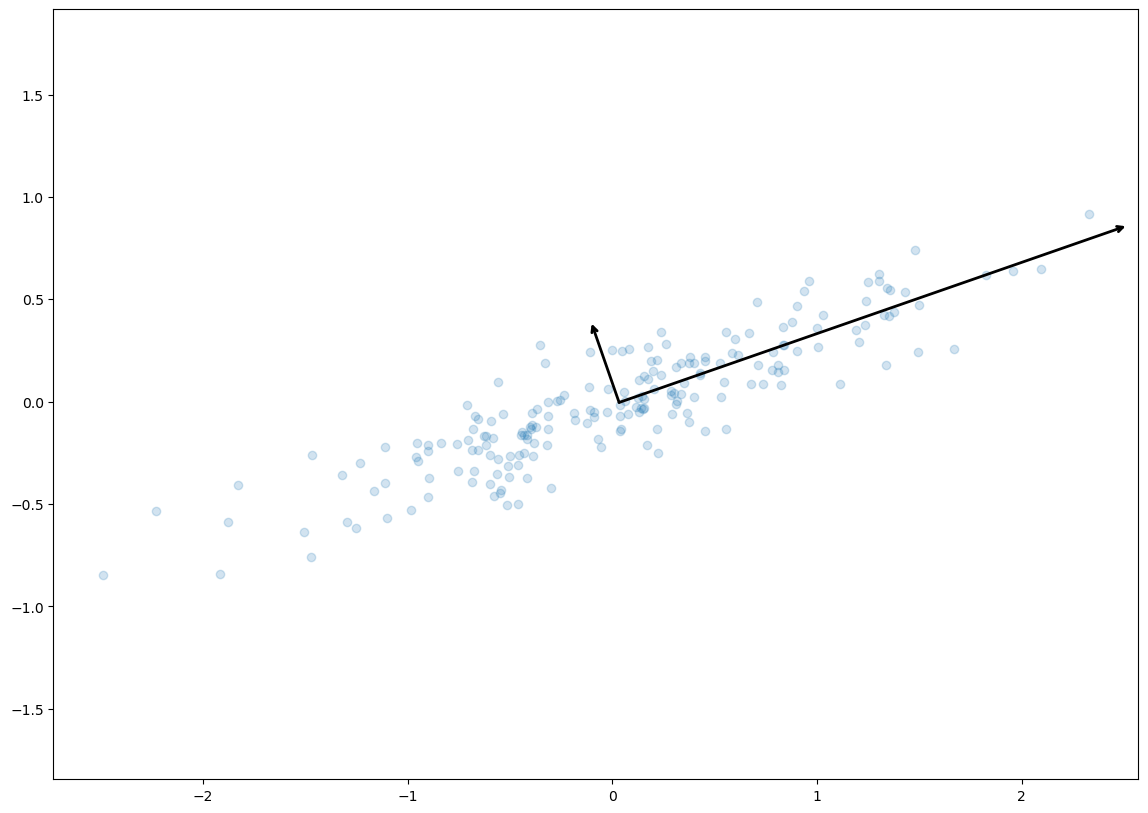

In [6]:
def dibujar_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# graficar los datos
plt.figure(figsize=(14,10))
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    dibujar_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

Estos vectores representan los ejes principales de los datos, y la longitud del vector es una indicación de cuán "importante" es ese eje para describir la distribución de los datos; más precisamente, es una medida de la varianza de los datos cuando se proyecta en ese eje. La proyección de cada punto de datos en los ejes principales son los "componentes principales" de los datos.

### Reducción de Dimensionalidad Utilizando PCA

El uso de PCA para la reducción de dimensionalidad implica poner a cero uno o más de los componentes principales más pequeños, lo que resulta en una proyección de menor dimensión de los datos que preserva la varianza máxima de datos.

Aquí hay un ejemplo del uso de PCA como una transformación de reducción de dimensionalidad:

In [36]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("dimensión original:   ", X.shape)
print("dimensión reducida:   ", X_pca.shape)

dimensión original:    (200, 2)
dimensión reducida:    (200, 1)


Los datos transformados se han reducido a una sola dimensión. Para comprender el efecto de esta reducción de dimensionalidad, podemos realizar la transformación inversa de estos datos reducidos y graficarlos junto con los datos originales:

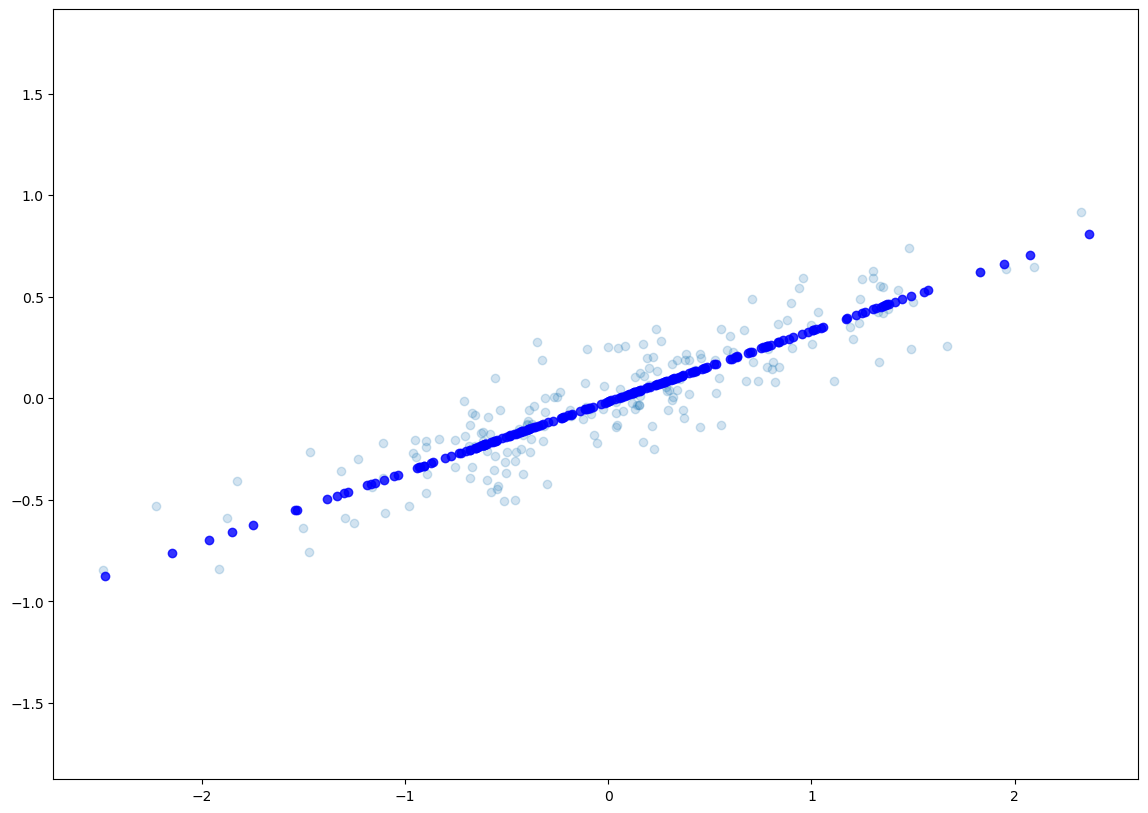

In [37]:
X_nuevo = pca.inverse_transform(X_pca)
plt.figure(figsize=(14,10))
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_nuevo[:, 0], X_nuevo[:, 1], c='b', alpha=0.8)
plt.axis('equal');

Los puntos de claros son los datos originales, mientras que los puntos oscuros son la versión proyectada. Esto deja en claro lo que significa una reducción de dimensionalidad de PCA: la información a lo largo de los ejes o ejes principales menos importantes se elimina, dejando solo el (los) componente(s) de los datos con la varianza más alta. La fracción de varianza que se corta (proporcional a la dispersión de puntos sobre la línea formada en esta figura) es aproximadamente una medida de cuánta "información" se descarta en esta reducción de dimensionalidad.

Este conjunto de datos de dimensión reducida es en algunos sentidos "lo suficientemente bueno" para codificar las relaciones más importantes entre los puntos: a pesar de reducir la dimensión de los datos en un 50%, la relación general entre los puntos de datos se conserva en su mayoría.

## Ejemplo 1: Reducción de Dimensionalidad con el Conjunto de Datos Iris

En este ejemplo aplicaremos PCA para reducir la dimensionalidad del conjunto de datos Iris de 4 dimensiones a 2 dimensiones.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

#### Cargar el Conjunto de Datos

In [39]:
# Cargar el conjunto de datos
iris = datasets.load_iris()
X = iris.data
y = iris.target

#### Aplicar PCA al Conjunto de Datos Iris

Aplicar PCA con 2 componentes al conjunto de datos Iris

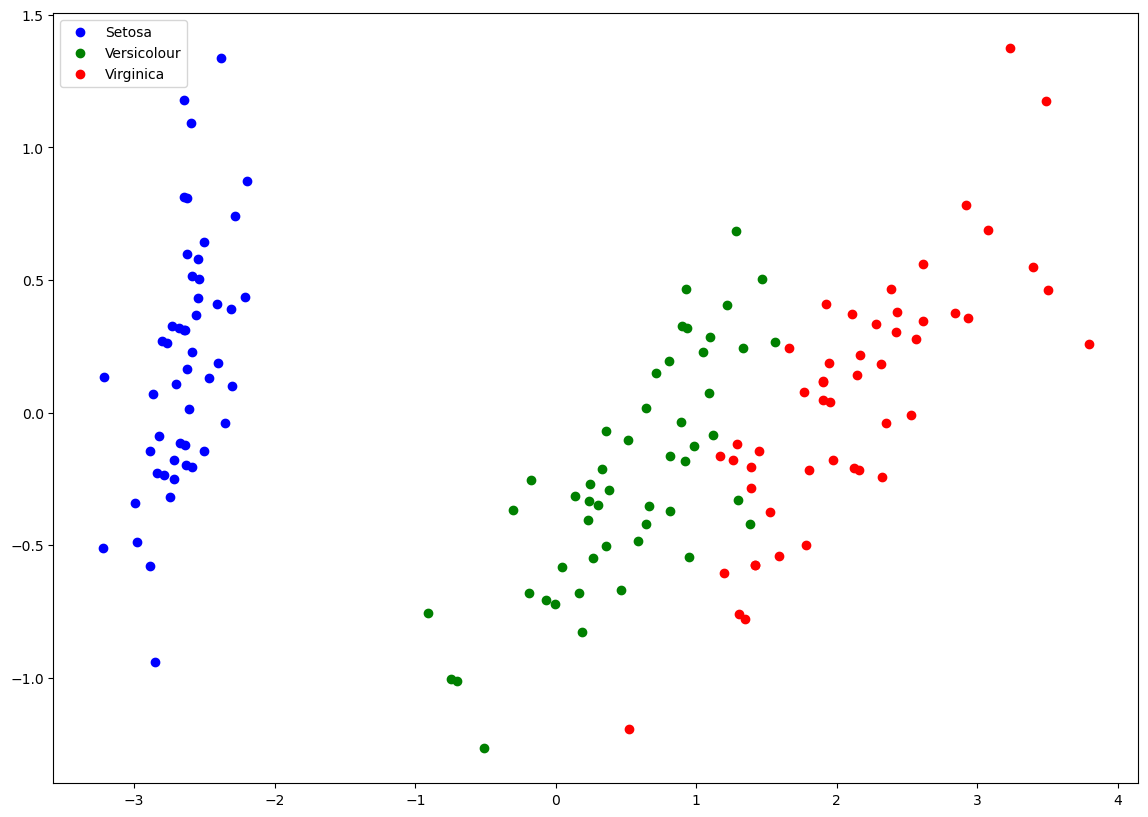

In [40]:
# Usando PCA con 2 componentes
pca = PCA(n_components=2)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

# Graficar los resultados del PCA
plt.figure(figsize=(14,10))
plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'bo', label='Setosa')
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'go', label='Versicolour')
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'ro', label='Virginica')
plt.legend(loc=0);

#### Componentes Principales

In [42]:
# Imprimir los componentes principales
print(pca.components_)
print(pca.components_.shape)

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]
(2, 4)


`pca.components_` tiene el significado de cada componente principal, esencialmente cómo se derivó, `pca.components_.shape` nos dice que tiene 2 filas, una para cada componente principal y 4 columnas, proporción de cada una de los 4 atributos por cada fila

#### Significado de los Componentes Principales

In [43]:
# Intentando descifrar el significado de los componentes principales
print("Significado de los 2 componentes:")
for component in pca.components_:
    print (" + ".join("%.2f x %s" % (value, name)
                     for value, name in zip(component, iris.feature_names)))

Significado de los 2 componentes:
0.36 x sepal length (cm) + -0.08 x sepal width (cm) + 0.86 x petal length (cm) + 0.36 x petal width (cm)
0.66 x sepal length (cm) + 0.73 x sepal width (cm) + -0.17 x petal length (cm) + -0.08 x petal width (cm)


Varianza explicada por los componentes principales

In [14]:
print(pca.explained_variance_ratio_)

[0.92461872 0.05306648]


Esto nos dice hasta qué punto cada componente explica el conjunto de datos original, así el primer componente es capaz de explicar ~ 92% de X y el segundo solo alrededor de 5.3%. Juntos pueden explicar alrededor del 97.3% de la varianza de X

## Ejemplo 2: Reducción de Dimensionalidad del Conjunto de Datos de Dígitos

Usaremos el conjunto de datos integrado en sklearn de dígitos escritos a mano. Las imágenes aquí son matrices 8x8 (intensidad de color blanco para cada píxel). Entonces, cada matriz se "despliega" en un vector de longitud 64.

In [44]:
from sklearn.datasets import load_digits
digitos = load_digits()
print(digitos.keys())
X,y = digitos.data, digitos.target

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


Comencemos visualizando nuestros datos. Obtenga los primeros 10 números. Los números están representados por matrices de 8 x 8 con la intensidad del color para cada píxel. Cada matriz se aplana en un vector de 64 números, por lo que obtenemos la versión de los atributos de los datos.

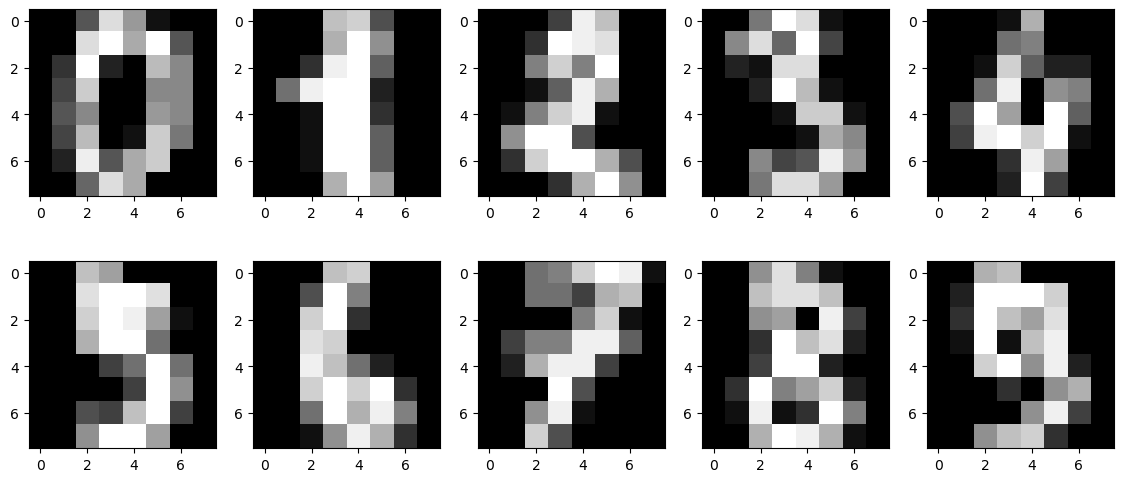

In [45]:
plt.figure(figsize=(14, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]), cmap='gray');

In [47]:
# Dimensiones de los datos
print(digitos.data.shape)

# Dimensiones de las imágenes
print(digitos.images.shape)

(1797, 64)
(1797, 8, 8)


Entonces, los atributos no son más que una nueva forma de los datos de imágenes 8x8 píxeles colocados uno al lado del otro describiendo la
intensidad de cada píxel. El problema es un conjunto de imágenes de dígitos de los cuales necesitamos aprender el objetivo, cual es el dígito real en sí.

In [54]:
## Aplicar PCA reteniendo el 95% de la varianza

pca_digitos=PCA(0.95)
X_proj = pca_digitos.fit_transform(X)
print(X.shape, X_proj.shape)

(1797, 64) (1797, 29)


Entonces, con 64 atributos originales, necesitamos 29 componentes principales para explicar el 95% de los datos originales

In [56]:
# Aplicar PCA con 2 componentes para graficar los datos en 2D
pca_digitos=PCA(2)
X_proj = pca_digitos.fit_transform(X)
print(np.sum(pca_digitos.explained_variance_ratio_))

0.285093648236993


Tener en cuenta que solo conservamos aproximadamente el 28% de la varianza al elegir 2 componentes

/var/folders/x4/__tc8h0d0rs9324_8_zvtysh0000gn/T/ipykernel_93558/3387462517.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(X_proj[:,0], X_proj[:,1], c=digitos.target, cmap=plt.cm.get_cmap('nipy_spectral', 10))


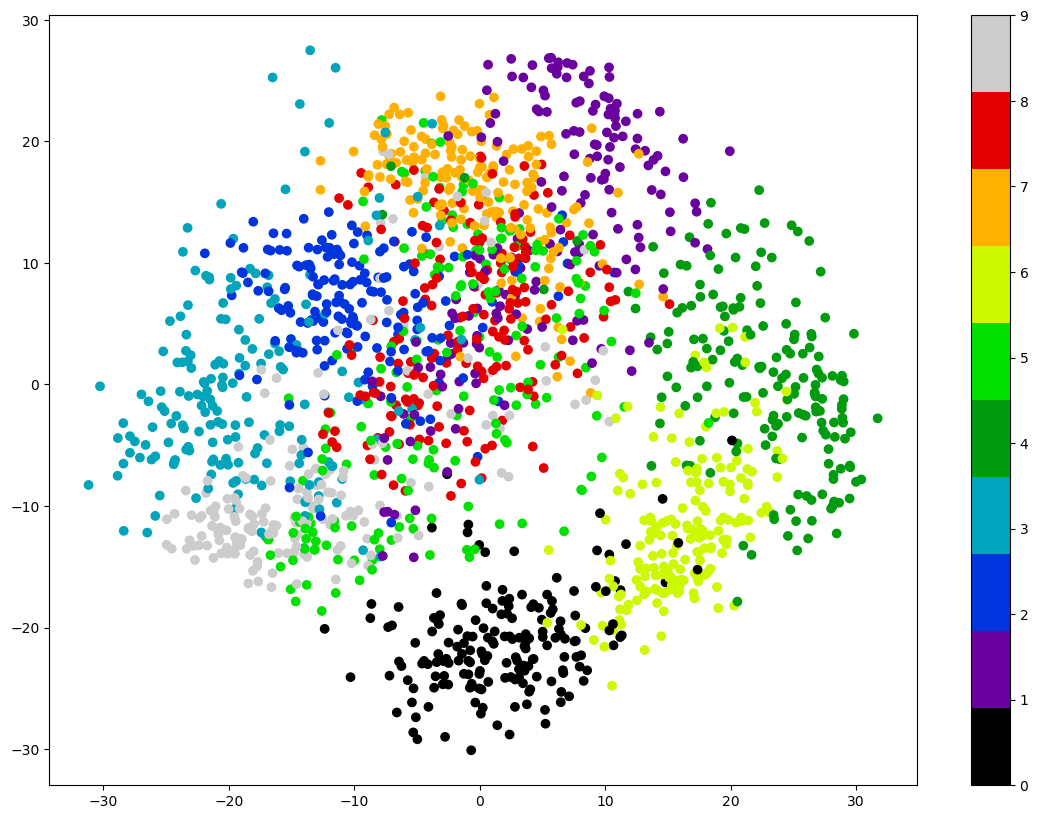

In [57]:
# Graficar los componentes principales en un gráfico de puntos
plt.figure(figsize=(14,10))
plt.scatter(X_proj[:,0], X_proj[:,1], c=digitos.target, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.show()

Esto básicamente traza los 2 componentes principales y colorea los valores según el objetivo (9 dígitos).
Explica maravillosamente algunas similitudes en los datos (aunque no lo suficiente).
Note que 0 es más o menos por sí mismo, mientras que 1 está bastante cerca de 7.

¿Cuantos datos estamos desperdiciando?

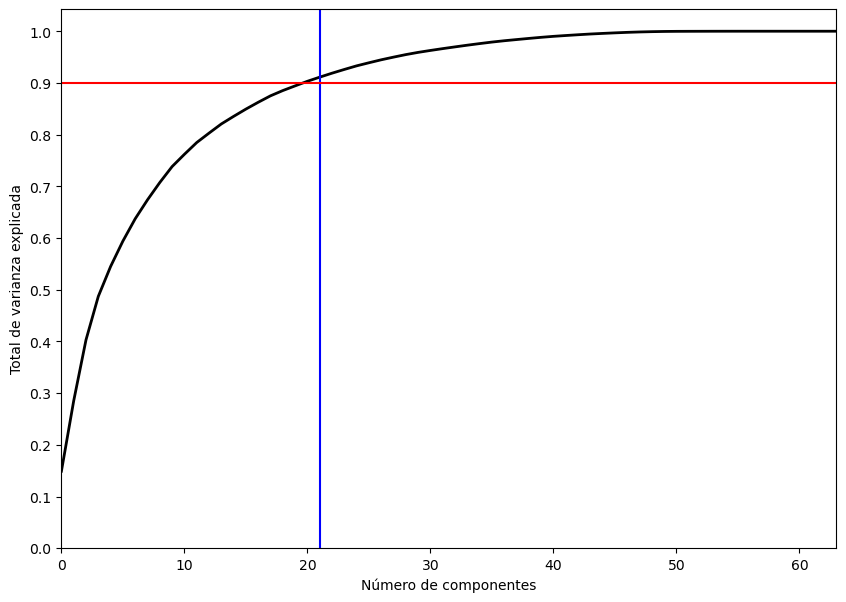

In [58]:
# Graficaremos el número de componentes versus la relación de varianza explicada como una suma acumulativa para descubrirlo
pca_digitos = PCA().fit(X)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca_digitos.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Número de componentes')
plt.ylabel('Total de varianza explicada')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(21, c='b')
plt.axhline(0.9, c='r')
plt.show();

Esta curva cuantifica qué parte de la varianza total de 64 dimensiones está contenida dentro de los primeros $N$
  componentes. Por ejemplo, vemos que con los dígitos los primeros 10 componentes contienen aproximadamente el 75% de la varianza, mientras que se necesitan alrededor de 50 componentes para describir cerca del 100% de la varianza.

Aquí vemos que nuestra proyección bidimensional pierde mucha información (medida por la varianza explicada) y que necesitaríamos unos 21 componentes para retener el 90% de la varianza. Esta gráfica para un conjunto de datos de gran dimensión puede ayudarlo a comprender el nivel de redundancia presente en múltiples observaciones.

## Ejemplo 3: Reducción de Dimensionalidad de un Conjunto de Datos de Caras (Olivetti-faces)

Hay diez imágenes diferentes de cada uno de 40 sujetos distintos. Para algunos
sujetos, las imágenes fueron tomadas en diferentes momentos, variando la iluminación,
expresiones faciales (ojos abiertos / cerrados, sonriendo / no sonriendo) y detalles faciales
 (gafas / sin gafas). Todas las imágenes fueron tomadas contra un fondo oscuro
 homogéneo con los sujetos en posición vertical y frontal (con
tolerancia para algún movimiento lateral).

In [59]:
from sklearn.datasets import fetch_olivetti_faces
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
caras = fetch_olivetti_faces()
print(caras.keys())

dict_keys(['data', 'images', 'target', 'DESCR'])


Formato de las imágenes:

In [61]:
print(caras.data.shape)

(400, 4096)


Visualizar las imágenes:

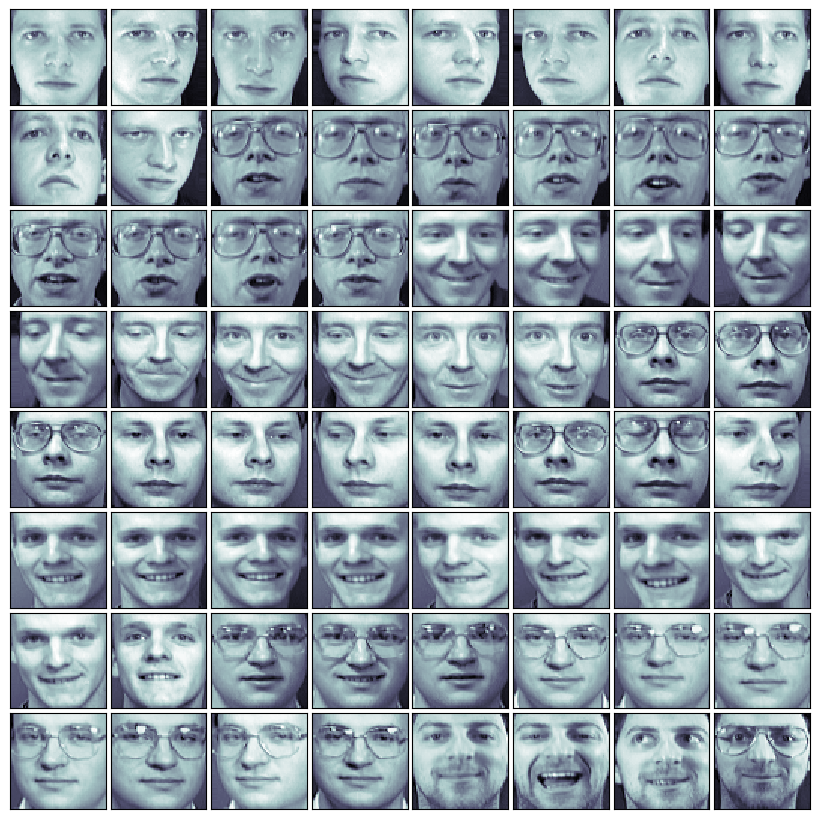

In [62]:
# Graficar caras
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# graficar las caras, cada imagen es 64 por 64 pixeles
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(caras.images[i], cmap=plt.cm.bone, interpolation='nearest')

plt.show()

Veamos qué parte de la varianza se retiene si comprimimos las imágenes a 8x8 (64) píxeles.

In [63]:
X, y = caras.data, caras.target
pca_caras = PCA(64)
X_proj = pca_caras.fit_transform(X)
print(X_proj.shape)

(400, 64)


Varianza conservada:

In [64]:
print(np.cumsum(pca_caras.explained_variance_ratio_))

[0.2381273  0.37806708 0.45775318 0.5077365  0.54383504 0.57540447
 0.5996728  0.6200368  0.6396179  0.6563391  0.67229134 0.6866611
 0.6991285  0.71059984 0.7212286  0.7310058  0.7401964  0.7483521
 0.75589085 0.7633607  0.77034646 0.7764927  0.782332   0.78802925
 0.7934912  0.7988097  0.80394787 0.80890626 0.8134829  0.8178947
 0.8219147  0.82575655 0.8293759  0.8327212  0.8359244  0.8390846
 0.84213567 0.8451212  0.8479421  0.85068077 0.8532777  0.8558137
 0.8582561  0.86065155 0.8629564  0.8652181  0.8674359  0.8696342
 0.8717215  0.8737656  0.8757237  0.87762094 0.8794445  0.8812122
 0.88295865 0.88465077 0.886303   0.88792175 0.8895175  0.8910592
 0.89257747 0.8940606  0.89551336 0.89694625]


Al comprimir una imagen de 64x64 píxeles en una imagen de 8x8 aún se conserva aproximadamente el 89.7% de la varianza.

Ahora tenemos un conjunto de datos de 64 dimensiones reducido, generado con 64 componentes principales.
Cada uno de estos componentes principales puede explicar alguna variación en el conjunto de datos original. El parámetro `components_` del
el objeto estimador nos da los componentes con mayor varianza.

A continuación, intentaremos visualizar los 8 componentes principales. Esto NO es una reconstrucción de los datos originales, solo
 visualizar los componentes principales como imágenes. Los componentes principales son vectores de la longitud = al número de atributos 4096. Tendremos que remodelarlo a una matriz de 64 x 64.

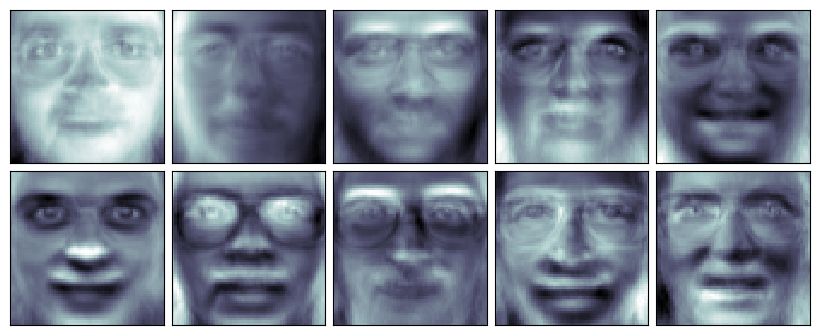

In [65]:
# Inicializar gráfico
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# graficar las caras, cada imagen es 64 por 64 pixeles
for i in range(10):
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[])
    ax.imshow(np.reshape(pca_caras.components_[i,:], (64,64)), cmap=plt.cm.bone, interpolation='nearest')

Impresionante, intentemos reconstruir las imágenes usando el nuevo conjunto de datos reducido. En otras palabras, transformamos el
Imágenes de $64\times64$ píxeles en imágenes de $8\times8$. Ahora, para visualizar cómo se ven estas imágenes, necesitamos invertir las imágenes de $8\times8$.
volver a la dimensión de $64\times64$. Tenga en cuenta que no estamos volviendo a los datos originales, simplemente volvemos a la
dimensión real de las imágenes originales para que podamos visualizarlas.

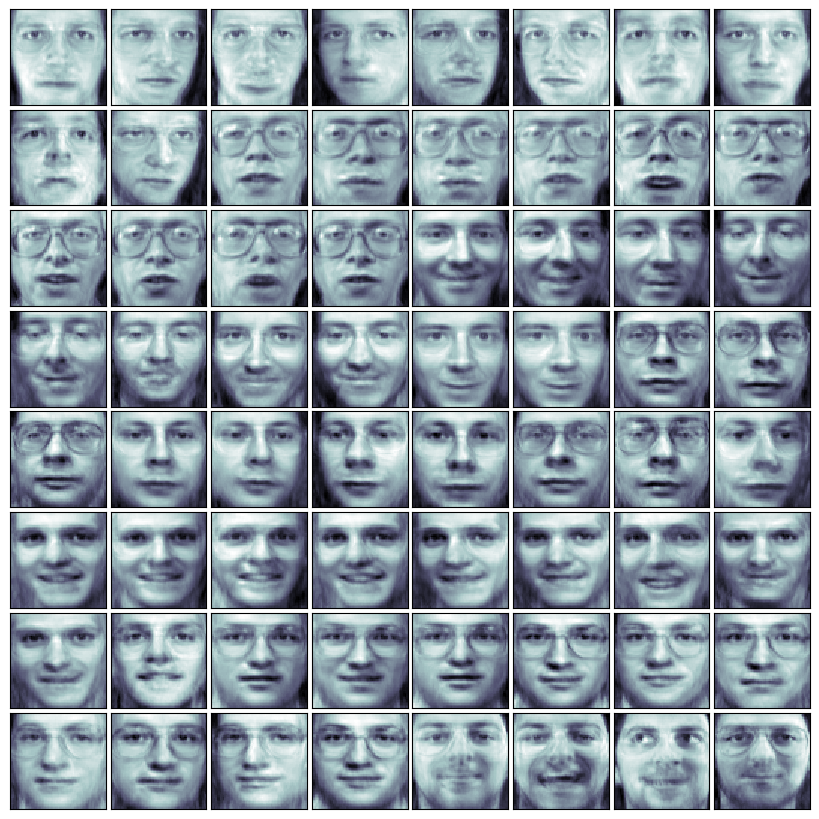

In [66]:
X_inv_proj = pca_caras.inverse_transform(X_proj)
#reshaping as 400 images of 64x64 dimension
X_proj_img = np.reshape(X_inv_proj,(400,64,64))

# Inicializar gráfico
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# pgraficar las caras, cada imagen es de dimensión 64 por 64 pero 8x8 pixeles
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(X_proj_img[i], cmap=plt.cm.bone, interpolation='nearest')

Esto no está nada mal, la imagen aún se ve bastante bien, pero faltan los detalles más finos, lo que está bien teniendo en cuenta que hemos reducido la dimensionalidad 64 veces.

### Referencias:

- [Python Data Science Handbook by Jake VanderPlas; In Depth: Principal Component Analysis](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)
- [Open Machine Learning Course. Topic 7. Unsupervised Learning: PCA and Clustering](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-7-unsupervised-learning-pca-and-clustering-db7879568417)
- [PCA with scikit-learn](https://github.com/shankarmsy/practice_PCA/blob/master/PCA%20with%20scikit-learn.py)